As always first import the libraries, in this case the library networkx helps a lot in the uses of graphs

In [92]:
import random
from networkx import Graph
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import operator

First we define our class node which has a name and neighbor nodes, a mehtod to get the times with its respective neighbors and its representation

In [93]:
class Node:
    def __init__(self, name, neighbors):
        self.name = name
        self.neighbors = neighbors
    def travel_time(self, node):
        return self.neighbors[node.name]['time'] #travel time to neighbours
    def __repr__(self):
        return "(" + str(self.name) + ")"

Then we define our graph

In [94]:
graph = Graph()
graph.add_edge("Rosario", "Instituto del petroleo", time=6)
graph.add_edge("Instituto del petroleo", "La Raza", time=2)
graph.add_edge("Instituto del petroleo", "Politecnico", time=1)
graph.add_edge("La Raza", "Guerrero", time=2)
graph.add_edge("Guerrero", "Hidalgo", time=1)
graph.add_edge("Hidalgo", "Tacuba", time=7)
graph.add_edge("Tacuba", "Rosario", time=4)
graph.add_edge("Deportivo 18 de marzo", "Instituto del petroleo", time=2)
graph.add_edge("Deportivo 18 de marzo", "La Raza", time=2)
graph.add_edge("Deportivo 18 de marzo", "Indios Verdes", time=1)
graph.add_edge("Martin Carrera", "Deportivo 18 de marzo", time=2)
graph.add_edge("Martin Carrera", "Consulado", time=3)
graph.add_edge("Consulado", "La Raza", time=3)
graph.add_edge("Consulado", "Oceania", time=3)
graph.add_edge("Consulado", "Morelos", time=2)
graph.add_edge("Garibaldi", "Guerrero", time=1)
graph.add_edge("Garibaldi", "Morelos", time=3)
graph.add_edge("Oceania", "San Lazaro", time=3)
graph.add_edge("Oceania", "Ciudad Azteca", time=1)
graph.add_edge("Morelos", "San Lazaro", time=1)
graph.add_edge("Pantitlan", "Oceania", time=3)
graph.add_edge("Pantitlan", "San Lazaro", time=6)
graph.add_edge("Candelaria", "San Lazaro", time=1)
graph.add_edge("Candelaria", "Morelos", time=1)
graph.add_edge("Pino Suarez", "Candelaria", time=2)
graph.add_edge("Pino Suarez", "Bellas artes", time=3)
graph.add_edge("Bellas artes", "Garibaldi", time=1)
graph.add_edge("Bellas artes", "Hidalgo", time=1)
graph.add_edge("Salto del agua", "Bellas artes", time=2)
graph.add_edge("Salto del agua", "Pino Suarez", time=2)
graph.add_edge("Balderas", "Hidalgo", time=2)
graph.add_edge("Balderas", "Salto del agua", time=1)
graph.add_edge("Balderas", "Tacubaya", time=6)
graph.add_edge("Tacuba", "Tacubaya", time=5)
graph.add_edge("Tacuba", "Cuatro Caminos", time=1)
graph.add_edge("Centro medico", "Tacubaya", time=3)
graph.add_edge("Centro medico", "Balderas", time=3)
graph.add_edge("Centro medico", "Chabacano", time=2)
graph.add_edge("Salto del agua", "Chabacano", time=3)
graph.add_edge("Pino Suarez", "Chabacano", time=2)
graph.add_edge("Jamaica", "Candelaria", time=2)
graph.add_edge("Jamaica", "Chabacano", time=1)
graph.add_edge("Jamaica", "Pantitlan", time=5)
graph.add_edge("Baja jamaica", "Chabacano", time=2)
graph.add_edge("Baja jamaica", "Jamaica", time=1)
graph.add_edge("Tacubaya", "Mixcoac", time=3)
graph.add_edge("Zapata", "Mixcoac", time=3)
graph.add_edge("Zapata", "Centro medico", time=4)
graph.add_edge("Zapata", "Ermita", time=3)
graph.add_edge("Zapata", "Universidad", time=2)
graph.add_edge("Ermita", "Chabacano", time=6)
graph.add_edge("Ermita", "Atlalilco", time=2)
graph.add_edge("Ermita", "Tasqueña", time=1)
graph.add_edge("Baja jamaica", "Atlalilco", time=6)
graph.add_edge("Tlahuac", "Atlalilco", time=1)


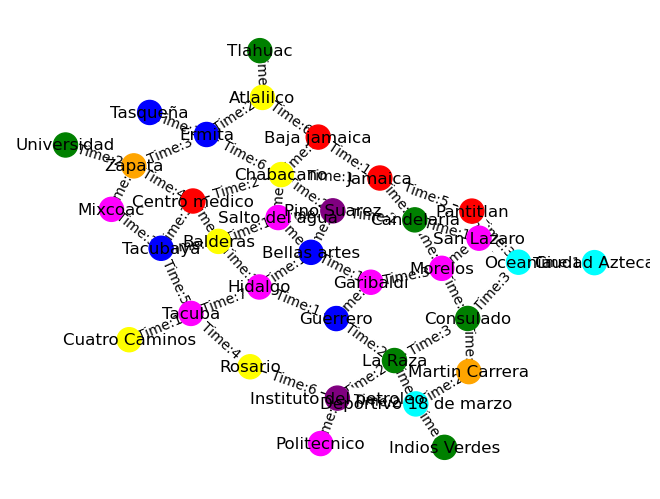

In [95]:
def draw_graph_with_random_colors(graph):
    pos = nx.spring_layout(graph)
    
    # Generate random colors for nodes
    num_nodes = len(graph.nodes)
    random_colors = [random.choice(['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta']) for _ in range(num_nodes)]
    
    nx.draw(graph, pos, with_labels=True, node_color=random_colors)
    
    edge_labels = {(u, v): f"Time:{graph[u][v]['time']}" for u, v in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black')
    
    plt.show()

draw_graph_with_random_colors(graph)

Now we can see the list of nodes that we have

In [96]:
nodeList = [Node(n, {nbr: graph.edges[n, nbr] for nbr in graph.neighbors(n)}) for n in graph.nodes()]
print(str(nodeList))

[(Rosario), (Instituto del petroleo), (La Raza), (Politecnico), (Guerrero), (Hidalgo), (Tacuba), (Deportivo 18 de marzo), (Indios Verdes), (Martin Carrera), (Consulado), (Oceania), (Morelos), (Garibaldi), (San Lazaro), (Ciudad Azteca), (Pantitlan), (Candelaria), (Pino Suarez), (Bellas artes), (Salto del agua), (Balderas), (Tacubaya), (Cuatro Caminos), (Centro medico), (Chabacano), (Jamaica), (Baja jamaica), (Mixcoac), (Zapata), (Ermita), (Universidad), (Atlalilco), (Tasqueña), (Tlahuac)]


Lets define the the departure node and the destination node, based on the list of the nodes list

In [97]:
def find_index(node: str) -> int:
    for i in range(len(nodeList)):
        if(node in nodeList[i].name):
            return i
        
start_node_index = find_index("Rosario")
end_node_index = find_index("San Lazaro")

Then we have our initialPopulation and generateGenome function to initialize a population of genomes

In [98]:
def createGenome(nodeList):
    genome = []
    remaining_nodes = nodeList.copy()

    current_node = remaining_nodes[start_node_index]
    remaining_nodes.remove(current_node)
    genome.append(current_node)

    while remaining_nodes:
      available_nodes = [node for node in remaining_nodes if node.name in current_node.neighbors]
      if not available_nodes:
          # if no available cities, return None
          return None 
      next_node = random.choice(available_nodes)
      if(next_node == nodeList[end_node_index]):
          genome.append(next_node)
          return genome
      else:
        genome.append(next_node)
        remaining_nodes.remove(next_node)
        current_node = next_node

    return genome

def initialPopulation(popSize, nodeList):
    population = []
    while len(population) < popSize:
        genome = createGenome(nodeList)
        if genome is not None:
            population.append(genome)
    return population

our fitness class that will check the fitness of the genome

In [99]:
class Fitness:
    def __init__(self, genome):
        self.genome = genome
        self.time = 0
        self.fitness = 0.0

    def routeDistance(self):
        path_time = 0
        for i in range(0, len(self.genome)):
            fromNode = self.genome[i]
            if i + 1 < len(self.genome):
                toCity = self.genome[i + 1]
            if toCity.name in fromNode.neighbors:
                path_time += fromNode.travel_time(toCity)
        self.time = path_time
        return  self.time

    def routeFitness(self):
        if self.fitness == 0:
            time = self.routeDistance()
            if time > 40:
                self.fitness = 0
            else:
                self.fitness = 1 / float(time)
        return self.fitness

This function will help us to rank the genomes by their fitness function, meaning that the first genomes are closer to the solution compared to the others.

In [100]:
def rankGenomes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()

    sorted_results=sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_results

In [101]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [102]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [103]:
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [104]:
def cross_Population(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])

        # Verificar si todos los nodos en la ruta son vecinos
        valid_child = all(node1.name in node2.neighbors for node1, node2 in zip(child[:-1], child[1:]))

        if valid_child:
            children.append(child)
        else:
            # Descartar el hijo generado y volver a intentar con nuevos padres
            continue

    return children

In [105]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            node1 = individual[swapped]
            node2 = individual[swapWith]

            # Verificar si los nodos adyacentes son vecinos antes de realizar la mutación
            if (swapped == 0 or node2.name in individual[swapped - 1].neighbors) and \
               (swapped == len(individual) - 1 or node2.name in individual[swapped + 1].neighbors) and \
               (swapWith == 0 or node1.name in individual[swapWith - 1].neighbors) and \
               (swapWith == len(individual) - 1 or node1.name in individual[swapWith + 1].neighbors):

                individual[swapped] = node2
                individual[swapWith] = node1
            else:
              continue

    return individual

In [106]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [107]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankGenomes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = cross_Population(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [108]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(rankGenomes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        best_fitness = rankGenomes(pop)[0][1]
        progress.append(best_fitness)
        best_genome_index = rankGenomes(pop)[0][0]
        best_genome = pop[best_genome_index]
        best_genome_fitness = Fitness(best_genome)
        best_genome_time = best_genome_fitness.routeDistance()

    best_genome_index = rankGenomes(pop)[0][0]
    best_genome = pop[best_genome_index]
    return best_genome

In [120]:
best_genome = geneticAlgorithm(population=nodeList, popSize=200, eliteSize=40, mutationRate=0.5, generations=500)

# Obtener el tiempo del mejor recorrido
best_genome_fitness = Fitness(best_genome)
best_genome_time = best_genome_fitness.routeDistance()

print("Best Route:")
print([city.name for city in best_genome])
print("Best Route Time:", best_genome_time)



Best Route:
['Rosario', 'Instituto del petroleo', 'La Raza', 'Consulado', 'Morelos', 'San Lazaro']
Best Route Time: 14
